## Replication for "Asymmetry by Design", March 22, 2020
### By Adam Goldstein and Charlie Eaton

### Appendix Figure A6: Estimated moderation effect of 4 or more multi-brand status on (log) average campus student enrollment in aftermath of law enforcement sanctions against parent firm

In [1]:
%set graph_format svg

In [2]:
quietly {
use "/Users/Charlie/Dropbox/Asymmetry by Design/Data/asymmetry_20191229.dta", clear
est clear
quietly sort unitid year
quietly gen law_enforce= 1 if law_enf_frst_this_yr==1 
quietly bys unitid: carryforward law_enforce, replace 
quietly recode unitid .=0

quietly bys systemid year: egen Sys_law_enforce= min(law_enforce)
quietly sort systemid year
quietly by systemid: carryforward Sys_law_enforce, replace 
quietly recode Sys_law_enforce .=0

quietly sort unitid year

replace alt2multi_brands_all=alt2multi_brands_all4
quietly label define alt2multi_brands_all 0 "Single Brand Firm" 1 "Multi Brand Firm"
quietly label val alt2multi_brands_all alt2multi_brands_all
quietly gen campus=1 if total_enrollment_log!=.
quietly bysort systemid: egen sys_campuses=total(campus)

quietly reghdfe total_enrollment_log i.alt2multi_brands_all##i.Sys_law_enforce i.iclevel i.owner_pe sys_campuses if year<2012, absorb(unitid year) vce(robust)
quietly margins i.alt2multi_brands_all, dydx(Sys_law_enforce) post
quietly eststo X_lawenforce_multibrand
quietly coefplot X_lawenforce_multibrand, vertical title(Pre 2012 consumer protection regs, size(medsmall)) ///
ylabel(-.3(.1).3 , grid glcolor(gs14)) ytitle(proportional decline in enrollment, margin(medsmall)) ///
scheme(s1mono) name(pre2013, replace)
}

In [3]:
est clear
quietly reghdfe total_enrollment_log i.alt2multi_brands_all##i.Sys_law_enforce i.iclevel i.owner_pe sys_campuses if year>2011 & year<2017, absorb(unitid year)
quietly margins i.alt2multi_brands_all, dydx(Sys_law_enforce) post
eststo X_lawenforce_multibrand
quietly coefplot X_lawenforce_multibrand, vertical title(Post 2012 consumer protection regs, size(medsmall)) ///
ylabel(-.3(.1).3 , grid glcolor(gs14)) ytitle(proportional decline in enrollment, margin(medsmall)) ///
scheme(s1mono) name(after2012, replace)

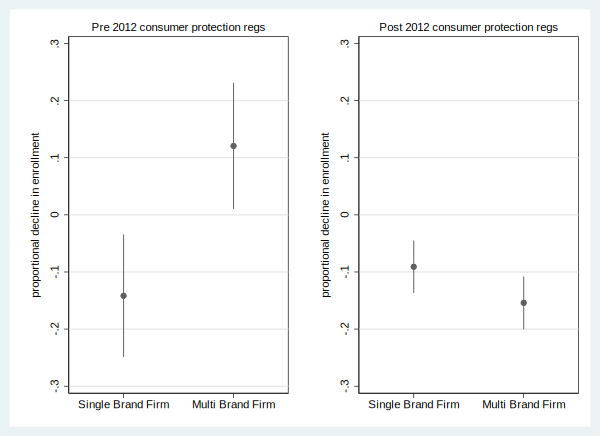




(file /Users/Charlie/Dropbox/Asymmetry by Design/Figures/F5_enroll_x_law_multi20
> 191222.pdf written in PDF format)


In [4]:
graph combine pre2013 after2012, name(prepost_lawenforce_multi, replace)

graph export "/Users/Charlie/Dropbox/Asymmetry by Design/Figures/F5_enroll_x_law_multi20191222.pdf", replace